# APS1070
#### Basic Principles and Models - Project 1
**Deadline: June 5, 11 PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: **Shrirup Dwivedi**

Student ID: 1006583421

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [16]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))


## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.5]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* What do these target classes signify?  The target class signifiies whether the participant is in 'Malignant' or 'Benign' category. If the target class is 1, the participant is 'Malignant' whereas if the target class is 0, the participant is 'Benign'.
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [17]:
print(df)
df.describe

     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]


<bound method NDFrame.describe of      mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]>

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.5]**




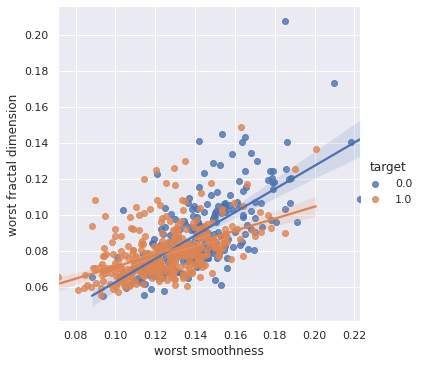

In [18]:
import seaborn as sns; sns.set_theme(color_codes=True)
df.head()
tips=df
sns.lmplot(x="worst smoothness", y="worst fractal dimension",hue="target", data=tips)


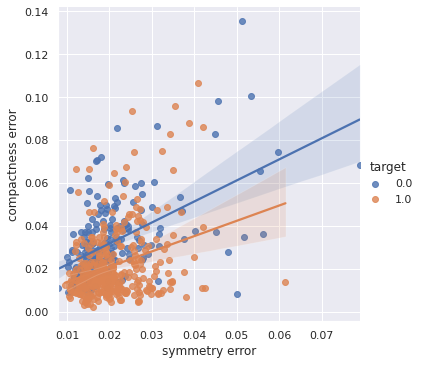

In [19]:
sns.lmplot(x="symmetry error", y="compactness error",hue="target", data=tips)

The two plots above show the non-standardized data for two different set of features. 

     mean smoothness  area error
0            0.11840      153.40
1            0.08474       74.08
2            0.10960       94.03
3            0.14250       27.23
4            0.10030       94.44
..               ...         ...
564          0.11100      158.70
565          0.09780       99.04
566          0.08455       48.55
567          0.11780       86.22
568          0.05263       19.15

[569 rows x 2 columns]


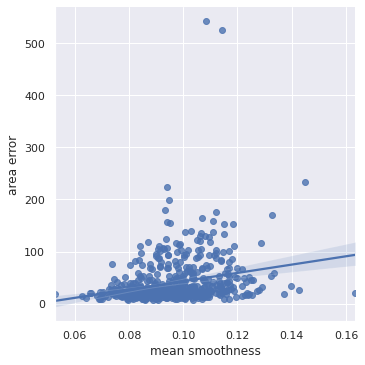

In [20]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set_theme(color_codes=True)
scldf=df.iloc[:,[4,13]]
print(scldf)
sns.lmplot(x="mean smoothness", y="area error", data=df)


The above plot shows two features without standardizaiton

     mean smoothness  area error
0           1.568466    2.487578
1          -0.826962    0.742402
2           0.942210    1.181336
3           3.283553   -0.288378
4           0.280372    1.190357
..               ...         ...
564         1.041842    2.604187
565         0.102458    1.291565
566        -0.840484    0.180698
567         1.525767    1.009503
568        -3.112085   -0.466152

[569 rows x 2 columns]


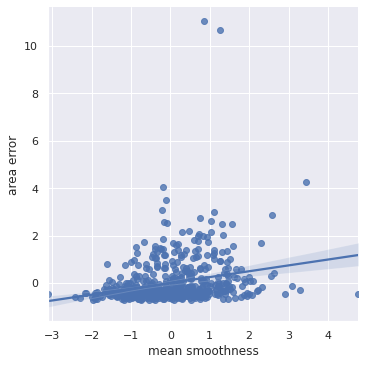

In [21]:
scaler = StandardScaler().fit(scldf)
#print(scaler.transform(scldf).mean(axis=0))
scaled=scaler.transform(scldf)
#print(scaled)
#type(scaled)
scaldf = pd.DataFrame(scaled, columns =['mean smoothness','area error'])
print(scaldf)
sns.lmplot(x="mean smoothness", y="area error", data=scaldf)

The above plot shows two features with standardizaiton

# Advantages of Standardization
Standardization is an important requirement for machine learning because it helps to make the dataset suitable for prediction and analysis. In the case presented above, the plot between 'mean smoothness' and 'area error' was distributed improperly. The range of 'area error' was not compatible with the range of 'mean smoothness'. The StandardScaler standarization helped these data to be presented in the form of normally distributed dataset.





### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [22]:
from sklearn.model_selection import train_test_split
X1=df.iloc[:,0:29]
Y1=df.iloc[:,30]
X_train, X_test, y_train, y_test = train_test_split( X1,Y1,test_size=0.33, random_state=0)

print ("X_train: \n" , X_train  )
print ("y_train: \n" , y_train  )
print ("\n")
print ("X_test: \n" , X_test  )
print ("y_test: \n" , y_test  )

X_train: 
      mean radius  mean texture  ...  worst concave points  worst symmetry
56        19.210         18.57  ...               0.20910          0.3537
144       10.750         14.97  ...               0.03413          0.2300
60        10.170         14.88  ...               0.02579          0.3557
6         18.250         19.98  ...               0.19320          0.3063
8         13.000         21.82  ...               0.20600          0.4378
..           ...           ...  ...                   ...             ...
277       18.810         19.98  ...               0.12940          0.2567
9         12.460         24.04  ...               0.22100          0.4366
359        9.436         18.32  ...               0.05052          0.2454
192        9.720         18.22  ...               0.00000          0.1909
559       11.510         23.93  ...               0.09653          0.2112

[381 rows x 29 columns]
y_train: 
 56     0.0
144    1.0
60     1.0
6      0.0
8      0.0
      ... 

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




The highest cross-validation accuracy train score is:  100.0 %
The highest cross-validation accuracy validation score is:  92.92207792207792 %
The best k which produces the highest cross-validaton accuracy train score is:  8


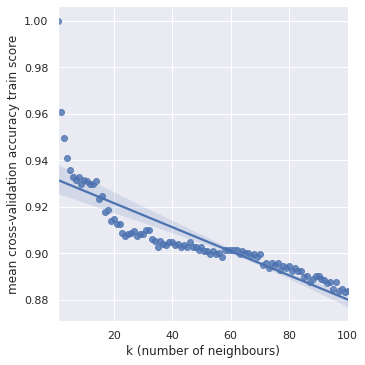

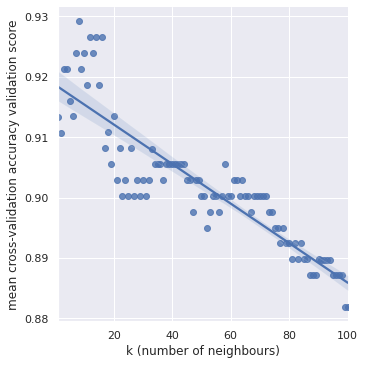

In [23]:
from sklearn.model_selection import cross_validate
from sklearn import neighbors
a=np.arange(1,101,1)
meanvaltrain=np.empty((100,1))
meanvalid=np.empty((100,1))
for a1 in a:

  knn = neighbors.KNeighborsClassifier(n_neighbors=a1)
  knn.fit(X_train,y_train)

  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)

  meanvaltrain[(a1-1),:]=scores['train_score'].mean()
  meanvalid[(a1-1),:]=scores['test_score'].mean()

att=a.reshape(100,1)

comb1=np.concatenate((att,meanvaltrain),axis=1)
comb2=np.concatenate((att,meanvalid),axis=1)

combdf1 = pd.DataFrame(comb1, columns =['k (number of neighbours)','mean cross-validation accuracy train score'])
combdf2 = pd.DataFrame(comb2, columns =['k (number of neighbours)','mean cross-validation accuracy validation score'])

sns.lmplot(x="k (number of neighbours)", y="mean cross-validation accuracy train score", data=combdf1)
sns.lmplot(x="k (number of neighbours)", y="mean cross-validation accuracy validation score", data=combdf2)
accmax1=np.amax(meanvaltrain)
accmax2=np.amax(meanvalid)
accmax2ind=np.argmax(meanvalid)+1
print('The highest cross-validation accuracy train score is: ', accmax1*100, '%')
print('The highest cross-validation accuracy validation score is: ', accmax2*100, '%')
print('The best k which produces the highest cross-validaton accuracy train score is: ',accmax2ind)


**3)**
As it can be seen from the plots above, the mean cross-validation accuracy for validation and test scores are very different. The mean cross-validation accuracy for train score is supposed to be a "good fit" as the fitting is appropriate with little variance. However, the plot of mean cross-validation accuracy validation score shows "underfitting" as the fit is too simplistic for the variance in the plot. The underfitting of this plot mainly occurs for the number of neighbours in the range between 1 to 80. **It should be noted that mean cross-validation accuracy validation score is considered for accuracy estimation**

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection.

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

Please note that you don't need to train a separate decision tree model for each iteration (each time you remove a feature). You should train a decision tree model only once in the begining of your function and then use the extracted feature importance as a reference to remove one (useless) feature at a time while you are monitoring the accuracy. 

Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the train set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
 
6. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

7. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[1]**


  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [24]:

def Feature_selector (X_train , y_train , tr=0.95):
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import cross_validate
  from sklearn import neighbors
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_ 
  impdf=pd.DataFrame({'Feature names':X_train.columns,'Importance':importance})
  impdfsort=impdf.sort_values(by='Importance',ascending=True)

  tt=impdfsort
  X_train
  X_traindummy=X_train.copy()
  X_traindummy
  impdfsortdummy=impdfsort.copy()

  accmaxer=1
  feadrop=[]
  accmaxer1=np.empty((29,1))
  accmaxer1[0]=accmax2
  accmaxerind1=np.empty((29,1))
  accmaxerind1[0]=accmax2ind
  count=0

  while len(X_traindummy.columns)>1 :
    print(len(X_traindummy.columns))
  #creating X_train for CV score
    sfd=impdfsortdummy.iloc[:,1] #importance order feature
    indsfd=sfd.idxmin() #importance order feature min index
    fg=impdfsort['Feature names'].squeeze()
    print(len(impdfsortdummy.index))
 
    X_traindummy.drop(labels=fg.loc[indsfd],axis=1,inplace=True)#dropping least imp feature
    feadrop.append(fg.loc[indsfd])
    print(feadrop)
 
  #calcalating CV
    aer=np.arange(1,101,1)
    meanvaltrainer=np.empty((100,1))
    for a1er in aer:
      knner = neighbors.KNeighborsClassifier(n_neighbors=a1er)
      knner.fit(X_traindummy,y_train)
      scoreser = cross_validate(knner, X_traindummy, y_train, cv=5,return_train_score=True)
      meanvaltrainer[(a1er-1),:]=scoreser['test_score'].mean()
   
  #presenting CV 
    atter=aer.reshape(100,1)
    comb1er=np.concatenate((atter,meanvaltrainer),axis=1)
    combdf1er = pd.DataFrame(comb1er, columns =['k (number of neighbours)','mean cross-validation accuracy train score'])
  

  #storing max CV and k
    accmaxer=np.max(meanvaltrainer)
    accmaxer1[count+1]=accmaxer
    accmaxerind=np.argmax(meanvaltrainer)+1
    accmaxerind1[count+1]=accmaxerind
    if accmaxer<(0.95*accmax2):
      break
 
    print('The highest cross-validation accuracy train score is: ', accmaxer*100, '%')
    print('The tuned k is: ',accmaxerind )

    impdfsortdummy.drop(impdfsortdummy['Importance'].idxmin(),inplace=True)
  
    count=count+1

  return accmaxer1,accmaxerind1,feadrop

#plotting CV accuracy versus number of features
  import matplotlib.pyplot as plt
  fea=len(X_train.columns)
  fea1=np.arange(fea,0,-1)
  newx=pd.Series(accmaxer1[:,0])
  newx.iloc[-1]=newx.iloc[-2]
  plt.plot(fea1, newx*100)
  plt.gca().invert_xaxis()
  plt.xlabel("Number of features")
  plt.ylabel("Mean cross validation accuracy")
  plt.show()


## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have standardized and original training data vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


29
29
['mean radius']
The highest cross-validation accuracy train score is:  96.59603554340397 %
The tuned k is:  8
28
28
['mean radius', 'worst concavity']
The highest cross-validation accuracy train score is:  95.80656185919345 %
The tuned k is:  12
27
27
['mean radius', 'worst concavity', 'mean perimeter']
The highest cross-validation accuracy train score is:  95.80656185919345 %
The tuned k is:  6
26
26
['mean radius', 'worst concavity', 'mean perimeter', 'worst compactness']
The highest cross-validation accuracy train score is:  96.32946001367053 %
The tuned k is:  4
25
25
['mean radius', 'worst concavity', 'mean perimeter', 'worst compactness', 'mean smoothness']
The highest cross-validation accuracy train score is:  96.33287764866711 %
The tuned k is:  14
24
24
['mean radius', 'worst concavity', 'mean perimeter', 'worst compactness', 'mean smoothness', 'mean compactness']
The highest cross-validation accuracy train score is:  96.85577580314423 %
The tuned k is:  14
23
23
['mean 

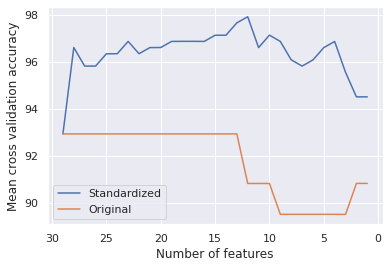

In [25]:
#standardization
scaler = StandardScaler()
X_trainf=scaler.fit(X_train)

X_trainstn=X_trainf.transform(X_train.values)
X_trainstn1=pd.DataFrame(X_trainstn,index=X_train.index,columns=X_train.columns) #to be used in feature selection

X_teststn=X_trainf.transform(X_test.values)
X_teststn1=pd.DataFrame(X_teststn,index=X_test.index,columns=X_test.columns)

#calling Feature_selector functions
stnmaxacc,stnmaxk,dropfeat=Feature_selector (X_trainstn1 , y_train , tr=0.95)
stnmaxacc1,stnmaxk1,dropfeat1=Feature_selector (X_train , y_train , tr=0.95)

#plotting the CV accuracy
import matplotlib.pyplot as plt
fea=len(X_trainstn1.columns)
feaa=len(X_train.columns)
fea1=np.arange(fea,0,-1)
fea11=np.arange(feaa,0,-1)
newx=pd.Series(stnmaxacc[:,0])
newx1=pd.Series(stnmaxacc1[:,0])
newx.iloc[-1]=newx.iloc[-2]
newx1.iloc[-1]=newx1.iloc[-2]
plt.plot(fea1, newx*100)
plt.plot(fea11,newx1*100)
plt.gca().invert_xaxis()
plt.xlabel("Number of features")
plt.ylabel("Mean cross validation accuracy")
plt.legend(["Standardized", "Original"])
plt.show()



It can be clearly seen from the figure above that Standardization have helped the model and its performance. As KNN model is used in this case, standardization makes all the features contribute equally in the determintion of similar measures. Therefore, standardization increases the performance of KNN model which is reflected in the results with mean cross validation accuracy higher than non-standardized accuracy.

**Overall, standardized model produced higher cross validation accuracy with the highest accuracy of ~98% with number of neighbours k=6** and the removed features : ['mean radius', 'worst concavity', 'mean perimeter', 'worst compactness', 'mean smoothness', 'mean compactness', 'worst smoothness', 'mean concave points', 'worst perimeter', 'mean fractal dimension', 'radius error', 'texture error', 'symmetry error', 'concavity error', 'compactness error', 'smoothness error']

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [34]:
#defining function test to test the dataset for best model
def test (X_teststn1 , y_test , tr=0.95):
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import cross_validate
  from sklearn import neighbors
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_teststn1,y_test)
  importance = dt.feature_importances_ 
  impdf=pd.DataFrame({'Feature names':X_teststn1.columns,'Importance':importance})
  impdfsort=impdf.sort_values(by='Importance',ascending=True)

  tt=impdfsort
  X_teststn1
  X_traindummy=X_teststn1.copy()
  X_traindummy
  impdfsortdummy=impdfsort.copy()

  accmaxer=1
  feadrop=[]
  accmaxer1=np.empty((29,1))
  accmaxer1[0]=accmax2
  accmaxerind1=np.empty((29,1))
  accmaxerind1[0]=accmax2ind
  count=0

  sfd=impdfsortdummy.iloc[:,1] #importance order feature
  indsfd=sfd.idxmin() #importance order feature min index
  fg=impdfsort['Feature names'].squeeze()

  X_traindummy.drop(columns=['mean radius', 'worst concavity', 'mean perimeter', 'worst compactness', 'mean smoothness', 'mean compactness', 'worst smoothness', 'mean concave points', 'worst perimeter', 'mean fractal dimension', 'radius error', 'texture error', 'symmetry error', 'concavity error', 'compactness error', 'smoothness error'])
 
  aer=np.arange(1,101,1)

    
  knner = neighbors.KNeighborsClassifier(n_neighbors=6)
  knner.fit(X_traindummy,y_test)
  scoreser = cross_validate(knner, X_traindummy, y_test, cv=5,return_train_score=True)
  meanvaltrainer=scoreser['test_score'].mean()
   

  print('The highest cross-validation accuracy test score is: ', meanvaltrainer*100, '%')

  impdfsortdummy.drop(impdfsortdummy['Importance'].idxmin(),inplace=True)

  count=count+1

  return accmaxer1,accmaxerind1,feadrop

In [35]:
#calling the function test to get the resulting CV accuracy
sddfsdf,stnmasdfsfdxk1,drsdfopfeat1=test (X_teststn1 , y_test , tr=0.95)

The highest cross-validation accuracy test score is:  96.25889046941678 %


Applying the best model as discussed in part 4, the highest cross-validation accuracy test score is estimated as ~96%. This is considered as a accuracy score and indicated that the model is trained correctly. 

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/